# Importing Necessary Dependencies(Libraries)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

# Task 1
 Take input from “train.txt” file. Plot all sample points from both classes, but samples from the same class should have the same color and marker. Observe if these two classes can be separated with a linear boundary.


### Importing Training samples from file

In [2]:
training_set = []
training_set = pd.read_csv('ass2exp2sirs.txt',sep=" ",header = None)
print('Numeric Visualization of Training Set: ')
print(training_set)
training_set=training_set.to_numpy()

Numeric Visualization of Training Set: 
   0    1  2
0  1  1.0  1
1  1 -1.0  1
2  2  2.5  2
3  0  2.0  2
4  2  3.0  2
5  4  5.0  1


### First and Second Class separation and display

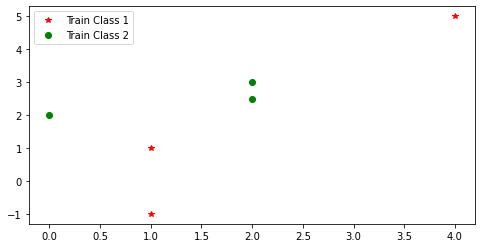

In [3]:
x = []
y = []
for train in training_set:
    if train[2]==1:
        x.append([train[0], train[1]])
    elif train[2]==2:
        y.append([train[0], train[1]])
first_class = np.array(x)
second_class = np.array(y)

plt.rcParams["figure.figsize"] = (8,4)
plt.plot(first_class[:,0:1],first_class[:, 1:], linestyle = '', marker='*', color='r', label ="Train Class 1")
plt.plot(second_class[:,0:1],second_class[:, 1:], linestyle = '', marker = 'o', color = 'g', label ="Train Class 2")
plt.legend()
plt.show()





##### The two classes can't be separated by a linear decision boundary. It needs a higher dimension separator

# Task 2 
Consider the case of a second order polynomial discriminant function. Generate the high dimensional sample points y, as discussed in the class using the formula mentioned in the question.

In [4]:
y = []

In [5]:
a=[]
b=[]
for i in range(len(first_class)):
    y.append([first_class[i][0]*first_class[i][0], first_class[i][1]*first_class[i][1], first_class[i][0]*first_class[i][1], first_class[i][0], first_class[i][1], 1])
    
for i in range(len(second_class)):
    y.append([-second_class[i][0]*second_class[i][0], -second_class[i][1]*second_class[i][1], -second_class[i][0]*second_class[i][1], -second_class[i][0], -second_class[i][1], -1])
        
y=np.array(y)


In [6]:
print(y)

[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [16.   25.   20.    4.    5.    1.  ]
 [-4.   -6.25 -5.   -2.   -2.5  -1.  ]
 [-0.   -4.   -0.   -0.   -2.   -1.  ]
 [-4.   -9.   -6.   -2.   -3.   -1.  ]]


# Task 3
Use Perceptron Algorithm (both one at a time and many at a time) for finding the weight-
coefficients of the discriminant function (i.e., values of w) boundary for your linear classifier in task 2.
Here α is the learning rate and 0 < α ≤ 1.

### One at A Time

In [7]:
w = np.ones((1,len(training_set)))
alpha = 0.1
flag = 0
counter = 0
g = 0
for i in range(250):
    counter = counter+1
    flag = 0
    for i in range(len(training_set)):
        g = np.matmul(y[i, :],w.T)
        if g<=0:
            w = w+alpha*y[i, :]
        else:
            flag = flag+1
    if flag==len(training_set):
        break



### Many at A Time

In [48]:
w2 = np.ones((1, len(training_set)))
alpha2 = 0.1
flag2 = 0
counter2 = 0
tmp = 0
g2 = 0
for i in range(3):
    print('-------------------------------------------------------------------------------------')
    print("y \t\t\t\t\t\t W \t\t\t\t\t  WTy")
    counter2 = counter2+1
    flag2 = 0
    tmp = 0
    for i in range(len(training_set)):
      
        print(y[i,:])
        g2 = np.matmul(y[i, :], w2.T)
        if g2<=0:
            tmp = tmp + y[i, :]
        else:
            flag2 = flag2+1
        print("\t\t\t\t\t\t\t\t\t\t\t\t\t\t",g2)    
    if flag2==len(training_set):
        break
    w2 = w2+alpha2*tmp
    print("\t\t\t\t\t  ",w2)


-------------------------------------------------------------------------------------
y 						 W 					  WTy
[1. 1. 1. 1. 1. 1.]
														 [6.]
[ 1.  1. -1.  1. -1.  1.]
														 [2.]
[16. 25. 20.  4.  5.  1.]
														 [71.]
[-4.   -6.25 -5.   -2.   -2.5  -1.  ]
														 [-20.75]
[-0. -4. -0. -0. -2. -1.]
														 [-7.]
[-4. -9. -6. -2. -3. -1.]
														 [-25.]
					   [[ 0.2   -0.925 -0.1    0.6    0.25   0.7  ]]
-------------------------------------------------------------------------------------
y 						 W 					  WTy
[1. 1. 1. 1. 1. 1.]
														 [0.725]
[ 1.  1. -1.  1. -1.  1.]
														 [0.425]
[16. 25. 20.  4.  5.  1.]
														 [-17.575]
[-4.   -6.25 -5.   -2.   -2.5  -1.  ]
														 [2.95625]
[-0. -4. -0. -0. -2. -1.]
														 [2.5]
[-4. -9. -6. -2. -3. -1.]
														 [5.475]
					   [[1.8   1.575 1.9   1.    0.75  0.8  ]]
-------------------------------------------------------------------------------------
y 		

# Task 4
Three initial weights have to be used (all one, all zero, randomly initialized with seed
fixed). For all of these three cases vary the learning rate between 0.1 and 1 with step size
0.1. Create a table which should contain your learning rate, number of iterations for one
at a time and batch Perceptron for all of the three initial weights. You also have to create
a bar chart visualizing your table data.

### All One :::: One At a Time  with lr =0.1- 1.1

In [9]:
## One at A Time
one_at_ones = []
one_at_alpha = []
for alpha in np.arange(0.1, 1.1, 0.1):
    w = np.ones((1,len(training_set)))
    counter = 0
    flag = 0
    g = 0
    for i in range(250):
        counter = counter+1
        flag = 0
        for i in range(len(training_set)):
            g = np.matmul(y[i, :],w.T)
            if g<=0:
                w = w+alpha*y[i, :]
            else:
                flag = flag+1
        if flag==len(training_set):
            break
    one_at_alpha.append(alpha)
    one_at_ones.append(counter)

## All Ones :::: Many At a Time  with lr =0.1- 1.1

In [10]:
## Many at A Time
many_at_ones = []
for alpha in np.arange(0.1, 1.1, 0.1):
    w2 = np.ones((1, len(training_set)))
    alpha2 = 0.1
    flag2 = 0
    counter2 = 0
    tmp = 0
    g2 = 0
    while counter2<250:
        counter2 = counter2+1
        flag2 = 0
        tmp = 0
        for i in range(len(training_set)):
            g2 = np.matmul(y[i, :], w2.T)
            if g2<=0:
                tmp = tmp + y[i, :]
            else:
                flag2 = flag2+1
        if flag2==len(training_set):
            break
        w2 = w2+alpha*tmp
    many_at_ones.append(counter2)
df = pd.DataFrame({"Alpha (Learning Rate)":one_at_alpha, "One at a Time":one_at_ones, "Many at a Time":many_at_ones})
df

,Alpha (Learning Rate),One at a Time,Many at a Time
0,0.1,6,102
1,0.2,92,104
2,0.3,104,91
3,0.4,106,116
4,0.5,93,105
5,0.6,93,114
6,0.7,108,91
7,0.8,115,91
8,0.9,94,105
9,1.0,94,93


## Plotting all one with lr=0.1-1

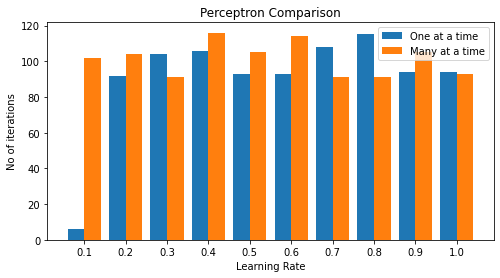

In [11]:

labels = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
one_at_time_ones = one_at_ones
many_at_time_ones = many_at_ones

x = np.arange(len(labels))  # the label locations
width = 40/100  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, one_at_time_ones, width, label='One at a time')
rects2 = ax.bar(x + width/2, many_at_time_ones, width, label='Many at a time')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No of iterations')
ax.set_xlabel('Learning Rate')
ax.set_title('Perceptron Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()




plt.rcParams["figure.figsize"] = (10,5)

plt.show()

## All Zeros :::: One At a Time  with lr =0.1- 1.1

In [12]:
## One at A Time
one_at_zeros = []
one_at_alpha = []
for alpha in np.arange(0.1, 1.1, 0.1):
    w = np.zeros((1,len(training_set)))
    counter = 0
    flag = 0
    g = 0
    for i in range(250):
        counter = counter+1
        flag = 0
        for i in range(len(training_set)):
            g = np.matmul(y[i, :],w.T)
            if g<=0:
                w = w+alpha*y[i, :]
            else:
                flag = flag+1
        if flag==len(training_set):
            break
    one_at_alpha.append(alpha)
    one_at_zeros.append(counter)




## All Zeros :::: Many At a Time  with lr =0.1- 1.1

In [13]:
## Many at A Time
many_at_zeros = []
for alpha in np.arange(0.1, 1.1, 0.1):
    w2 = np.zeros((1, len(training_set)))
    alpha2 = 0.1
    flag2 = 0
    counter2 = 0
    tmp = 0
    g2 = 0
    for i in range(200):
        counter2 = counter2+1
        flag2 = 0
        tmp = 0
        for i in range(len(training_set)):
            g2 = np.matmul(y[i, :], w2.T)
            if g2<=0:
                tmp = tmp + y[i, :]
            else:
                flag2 = flag2+1
        if flag2==len(training_set):
            break
        w2 = w2+alpha*tmp
    many_at_zeros.append(counter2)
df = pd.DataFrame({"Alpha (LR)":one_at_alpha, "One at a Time":one_at_zeros, "Many at a Time":many_at_zeros})
df

,Alpha (LR),One at a Time,Many at a Time
0,0.1,94,105
1,0.2,94,105
2,0.3,94,92
3,0.4,94,105
4,0.5,94,92
5,0.6,94,92
6,0.7,94,92
7,0.8,94,105
8,0.9,94,105
9,1.0,94,92


## Plotting all zeros with lr=0.1-1

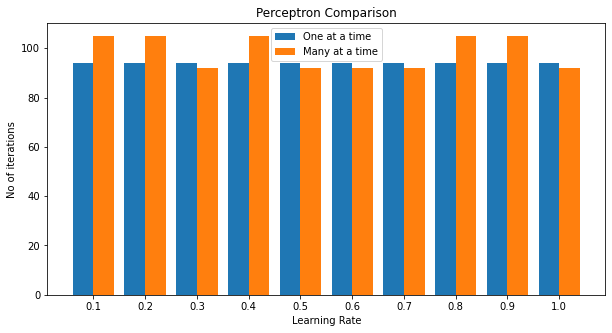

In [14]:
labels = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
one_at_time_zeros = one_at_zeros
many_at_time_zeros = many_at_zeros

x = np.arange(len(labels))  # the label locations
width = 40/100  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, one_at_time_zeros, width, label='One at a time')
rects2 = ax.bar(x + width/2, many_at_time_zeros, width, label='Many at a time')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No of iterations')
ax.set_xlabel('Learning Rate')
ax.set_title('Perceptron Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


plt.rcParams["figure.figsize"] = (10,7)

plt.show()

### Randomly Initialized with Seed Fixed

In [15]:
## One at A Time
one_at_random = []
one_at_alpha = []
for alpha in np.arange(0.1, 1.1, 0.1):
    np.random.seed(10)
    w = np.random.random((1,len(training_set)))
    counter = 0
    flag = 0
    g = 0
    for i in range(250):
        counter = counter+1
        flag = 0
        for i in range(len(training_set)):
            g = np.matmul(y[i, :],w.T)
            if g<=0:
                w = w+alpha*y[i, :]
            else:
                flag = flag+1
        if flag==len(training_set):
            break
    one_at_alpha.append(alpha)
    one_at_random.append(counter)

    
print(one_at_alpha)
print(one_at_random)
## Many at A Time
many_at_random = []
for alpha in np.arange(0.1, 1.1, 0.1):
    np.random.seed(10)
    w2 = np.random.random((1, len(training_set)))
    alpha2 = 0.1
    flag2 = 0
    counter2 = 0
    tmp = 0
    g2 = 0
    for i in range(200):
        counter2 = counter2+1
        flag2 = 0
        tmp = 0
        for i in range(len(training_set)):
            g2 = np.matmul(y[i, :], w2.T)
            if g2<=0:
                tmp = tmp + y[i, :]
            else:
                flag2 = flag2+1
        if flag2==len(training_set):
            break
        w2 = w2+alpha*tmp
    many_at_random.append(counter2)
df = pd.DataFrame({"Alpha (LR)":one_at_alpha, "One at a Time":one_at_random, "Many at a Time":many_at_random})
df

[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0]
[97, 95, 93, 101, 106, 113, 94, 113, 108, 101]


,Alpha (LR),One at a Time,Many at a Time
0,0.1,97,84
1,0.2,95,91
2,0.3,93,117
3,0.4,101,133
4,0.5,106,90
5,0.6,113,105
6,0.7,94,88
7,0.8,113,138
8,0.9,108,138
9,1.0,101,150


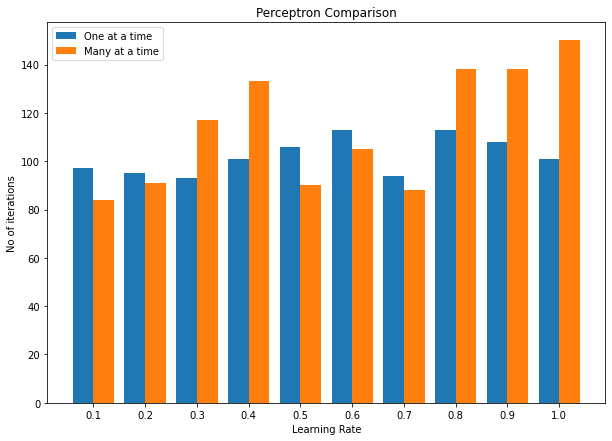

In [16]:
labels = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
one_at_time_random = one_at_random
many_at_time_random = many_at_random

x = np.arange(len(labels))  # the label locations
width = 40/100  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, one_at_time_random, width, label='One at a time')
rects2 = ax.bar(x + width/2, many_at_time_random, width, label='Many at a time')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No of iterations')
ax.set_xlabel('Learning Rate')
ax.set_title('Perceptron Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()





plt.rcParams["figure.figsize"] = (10,5)

plt.show()

# Questions
Address these following questions:

a. In task 2, why do we need to take the sample points to a high dimension?

b. In each of the three initial weight cases and for each learning rate, how many updates 
does the algorithm take before converging?

# Answers

A. We need to take sample points in a higher dimension
because when datasets are linear, the decision boundary
will work perfectly. If the data is non linear, we will not
get the correct hyperplane. Also, they are not linearly
separable. For making these points linearly separable we
need to take it to a higher dimension.


B. In each of the three initial weight cases for each learning
rate the number of updates or iterations the algorithm takes before
converging is shown in  the tables given and the graphs plotted in Task 4.